<a href="https://colab.research.google.com/github/Hbrand03/Intro_to_ML_Work/blob/main/Homework_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 1a

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 74s 46ms/step - accuracy: 0.3407 - loss: 1.7763 - val_accuracy: 0.5065 - val_loss: 1.3890
Epoch 2/200
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 43ms/step - accuracy: 0.5647 - loss: 1.2226 - val_accuracy: 0.6041 - val_loss: 1.1250
Epoch 3/200
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 67s 43ms/step - accuracy: 0.6313 - loss: 1.0557 - val_accuracy: 0.6413 - val_loss: 1.0133
Epoch 4/200
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 43ms/step - accuracy: 0.6666 - loss: 0.9464 - val_accuracy: 0.6651 - val_loss: 0.9579
Epoch 5/200
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 42ms/step - accuracy: 0.6949 - loss: 0.8641 - val_accuracy: 0.6741 - val_loss: 0.9415
Epoch 6/200
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 41ms/step - accuracy: 0.7231 - loss: 0.7970 - val_accuracy: 0.6865 - val_loss: 0.9024
Epoch 7/200
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 65s 41ms/step - accuracy: 0.7329 - loss: 0.7567 - val_accuracy: 0.6932 - val_loss: 0.8930
Epoch 8/200
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 41ms/step - accuracy: 

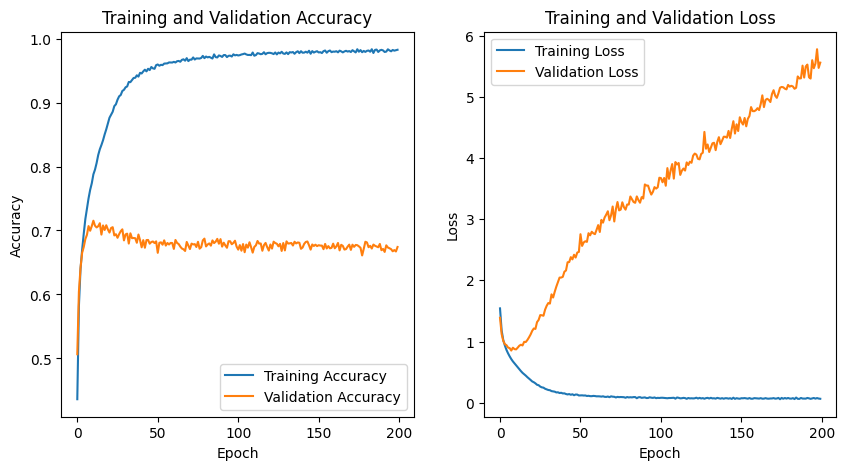

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import time

# Load CIFAR-10 data
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
start_time = time.time()
history = model.fit(train_images, train_labels, epochs=200,
                    validation_data=(test_images, test_labels))
end_time = time.time()

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

# Print training time, loss, and accuracy
train_time = end_time - start_time
print(f"Training time: {train_time:.2f} seconds")
print(f"Test accuracy: {test_acc*100:.2f}%")

# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Problem 1b

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import time

# Load and prepare CIFAR-10 data
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0

# Build the extended CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Conv2D(128, (3, 3), activation='relu'),  # Additional convolution layer
    layers.MaxPooling2D((2, 2)),                   # Additional pooling layer
    layers.Flatten(),
    layers.Dense(128, activation='relu'),          # Adjusted fully connected layer
    layers.Dense(10)
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
start_time = time.time()
history = model.fit(train_images, train_labels, epochs=200,
                    validation_data=(test_images, test_labels))
end_time = time.time()

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

# Report training time, loss, and accuracy
train_time = end_time - start_time
print(f"Training time: {train_time:.2f} seconds")
print(f"Test accuracy: {test_acc*100:.2f}%")
print(f"Test loss: {test_loss}")

# Plot training and validation accuracy and loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Problem 2a

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, ReLU, Add, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import cifar10
import numpy as np
import time

# Load CIFAR-10 data
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

def resnet_block(input_tensor, num_filters):
    """Function to add 2 convolutional layers with the parameters passed to it"""
    x = Conv2D(num_filters, (3, 3), padding='same')(input_tensor)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    x = Conv2D(num_filters, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)

    # Add shortcut value to pass through the layers
    x = Add()([x, input_tensor])
    x = ReLU()(x)
    return x

# Start model definition.
input_layer = Input(shape=(32, 32, 3))

# Initial feature extraction
x = Conv2D(64, (3, 3), padding='same')(input_layer)
x = BatchNormalization()(x)
x = ReLU()(x)

# Add 5 ResNet blocks with 64 filters each
for _ in range(5):
    x = resnet_block(x, 64)

# End of network: global average pooling followed by a dense layer
x = GlobalAveragePooling2D()(x)
output_layer = Dense(10, activation='softmax')(x)

model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Train the model
start_time = time.time()
history = model.fit(train_images, train_labels, epochs=200, validation_data=(test_images, test_labels), batch_size=64)
end_time = time.time()

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

# Print training time, loss, and accuracy
print(f"Training time: {end_time - start_time:.2f} seconds")
print(f"Test accuracy: {test_acc*100:.2f}%")
print(f"Test loss: {test_loss}")
